In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score



In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#Use LabelEncoder to convert the label into numbers.
le = preprocessing.LabelEncoder()
df['y']=le.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
df_dummies = pd.get_dummies(df)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int32  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [10]:
#Column "duration" must be deleted
df_dummies=df_dummies.drop(columns=['duration'])

In [11]:
#Check if there are any missing values in the dataset. If there are, drop the rows
df_dummies.isna().any().any()

False

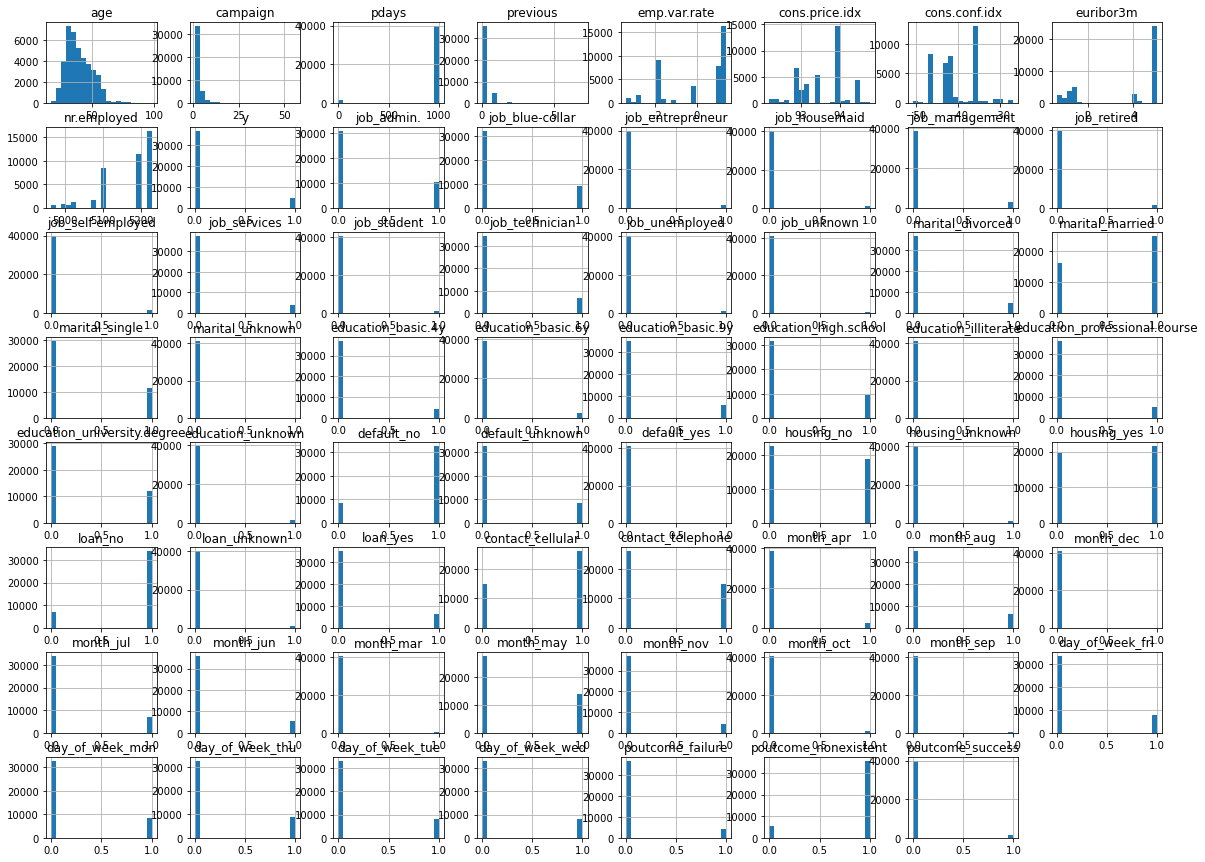

In [12]:
#Plot histogram of the label and calculate the imbalance in the dataset
_ = df_dummies.hist(bins=20, figsize=(20,15))


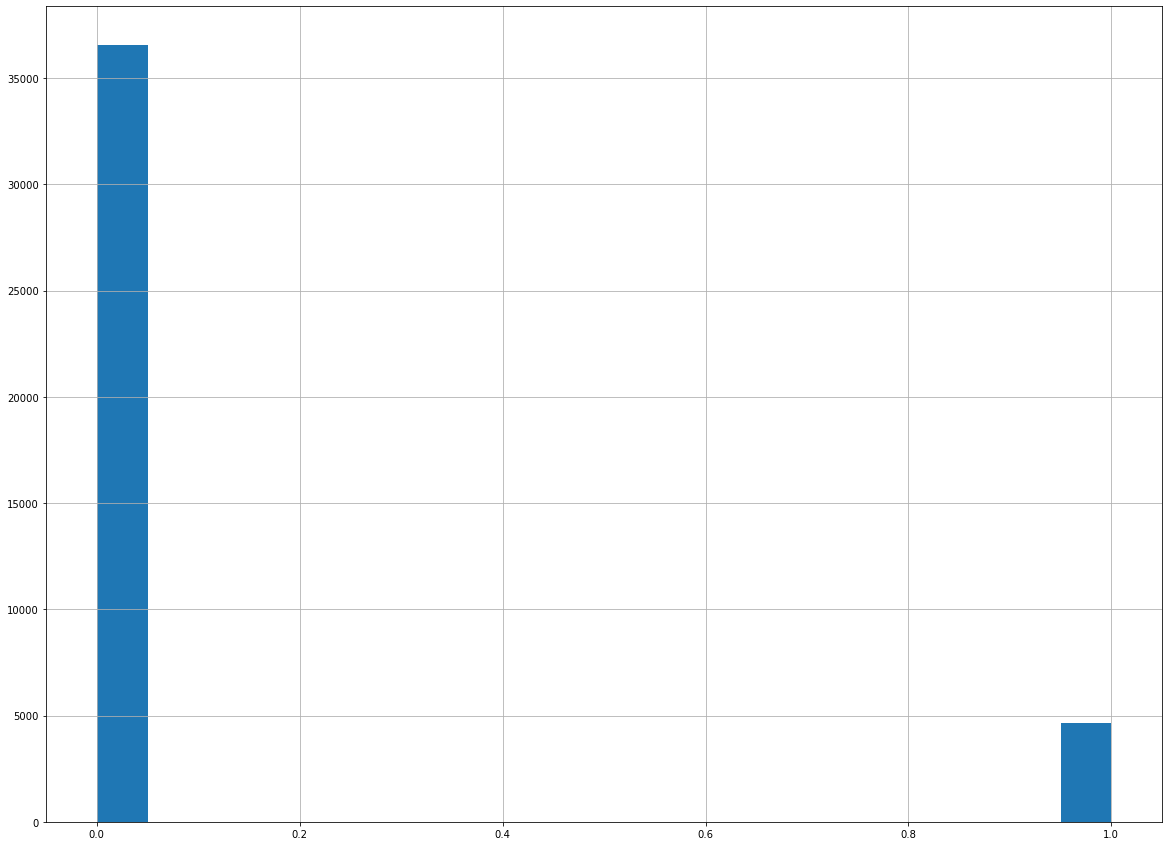

In [13]:
_ = df_dummies['y'].hist(bins=20, figsize=(20,15))

In [19]:
imbalance = df_dummies["y"].value_counts()[1]/len(df_dummies["y"])
print(imbalance)


0.11265417111780131


In [21]:
x_df = df_dummies.drop("y", axis=1)
# x_df = x_df.drop("duration", axis=1)
print(x_df.columns)
y_df = df_dummies["y"]

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [44]:
# Create separate training and test sets. we'll use the training set for steps 3--6
train_x,  test_x, train_y, test_y = train_test_split(x_df, y_df, test_size=0.2, random_state=50, stratify=y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_x), len(train_y))
print(len(test_x), len(test_y))

32950 32950
8238 8238


In [45]:
# Let's make a copy of the training set to ensure we don't mess things up
# df_train = train_set.copy()
# y_train = df_train['y']
# X_train= df_train.drop(columns=['y'])



In [51]:

clf = RandomForestClassifier(n_estimators=1000, max_depth=10,random_state=60)
dummy_clf = DummyClassifier(strategy="stratified") 
scores = cross_val_score(clf, train_x, train_y, cv=10, scoring=make_scorer(f1_score))
dummy_scores = cross_val_score(dummy_clf, train_x, train_y, cv=10, scoring=make_scorer(f1_score))
print("f1_Score: %.8f +/- %.8f" % (scores.mean(), scores.std()))
print("f1_Score : %.8f +/- %.8f" % (dummy_scores.mean(), dummy_scores.std()))



f1_Score: 0.32982550 +/- 0.04172795
f1_Score : 0.11189458 +/- 0.01388005


In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_x, train_y)
print(CV_rfc.best_estimator_)


RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=200)


In [36]:


clf_new = RandomForestClassifier(n_estimators=100, max_depth=3)
dummy_clf_new = DummyClassifier(strategy="stratified") 
scores = cross_val_score(clf_new, train_x, train_y, cv=10, scoring=make_scorer(f1_score))
dummy_scores = cross_val_score(dummy_clf_new, train_x, train_y, cv=10, scoring=make_scorer(f1_score))
print("f1_Score: %.8f +/- %.8f" % (scores.mean(), scores.std()))
print("f1_Score : %.8f +/- %.8f" % (dummy_scores.mean(), dummy_scores.std()))



f1_Score: 0.23301099 +/- 0.03847168
f1_Score : 0.10792051 +/- 0.01465043


Feature ranking:
1. nr.employed (0.146933)
2. euribor3m (0.142862)
3. pdays (0.093918)
4. poutcome_success (0.074663)
5. emp.var.rate (0.066610)
6. cons.conf.idx (0.065194)
7. cons.price.idx (0.053372)
8. age (0.044744)
9. previous (0.025034)
10. campaign (0.017224)
11. poutcome_nonexistent (0.016363)
12. poutcome_failure (0.015769)
13. month_oct (0.014927)
14. month_mar (0.014474)
15. contact_cellular (0.013814)
16. month_may (0.013082)
17. contact_telephone (0.012080)
18. day_of_week_mon (0.008207)
19. month_apr (0.007968)
20. education_university.degree (0.006273)
21. day_of_week_thu (0.005442)
22. day_of_week_fri (0.005422)
23. housing_yes (0.005376)
24. day_of_week_tue (0.005311)
25. housing_no (0.005295)
26. job_blue-collar (0.005134)
27. marital_single (0.005124)
28. month_jun (0.005032)
29. marital_married (0.004991)
30. day_of_week_wed (0.004980)
31. job_retired (0.004866)
32. education_high.school (0.004823)
33. default_no (0.004708)
34. job_student (0.004612)
35. default_unk

(0.0, 0.33834636735981893)

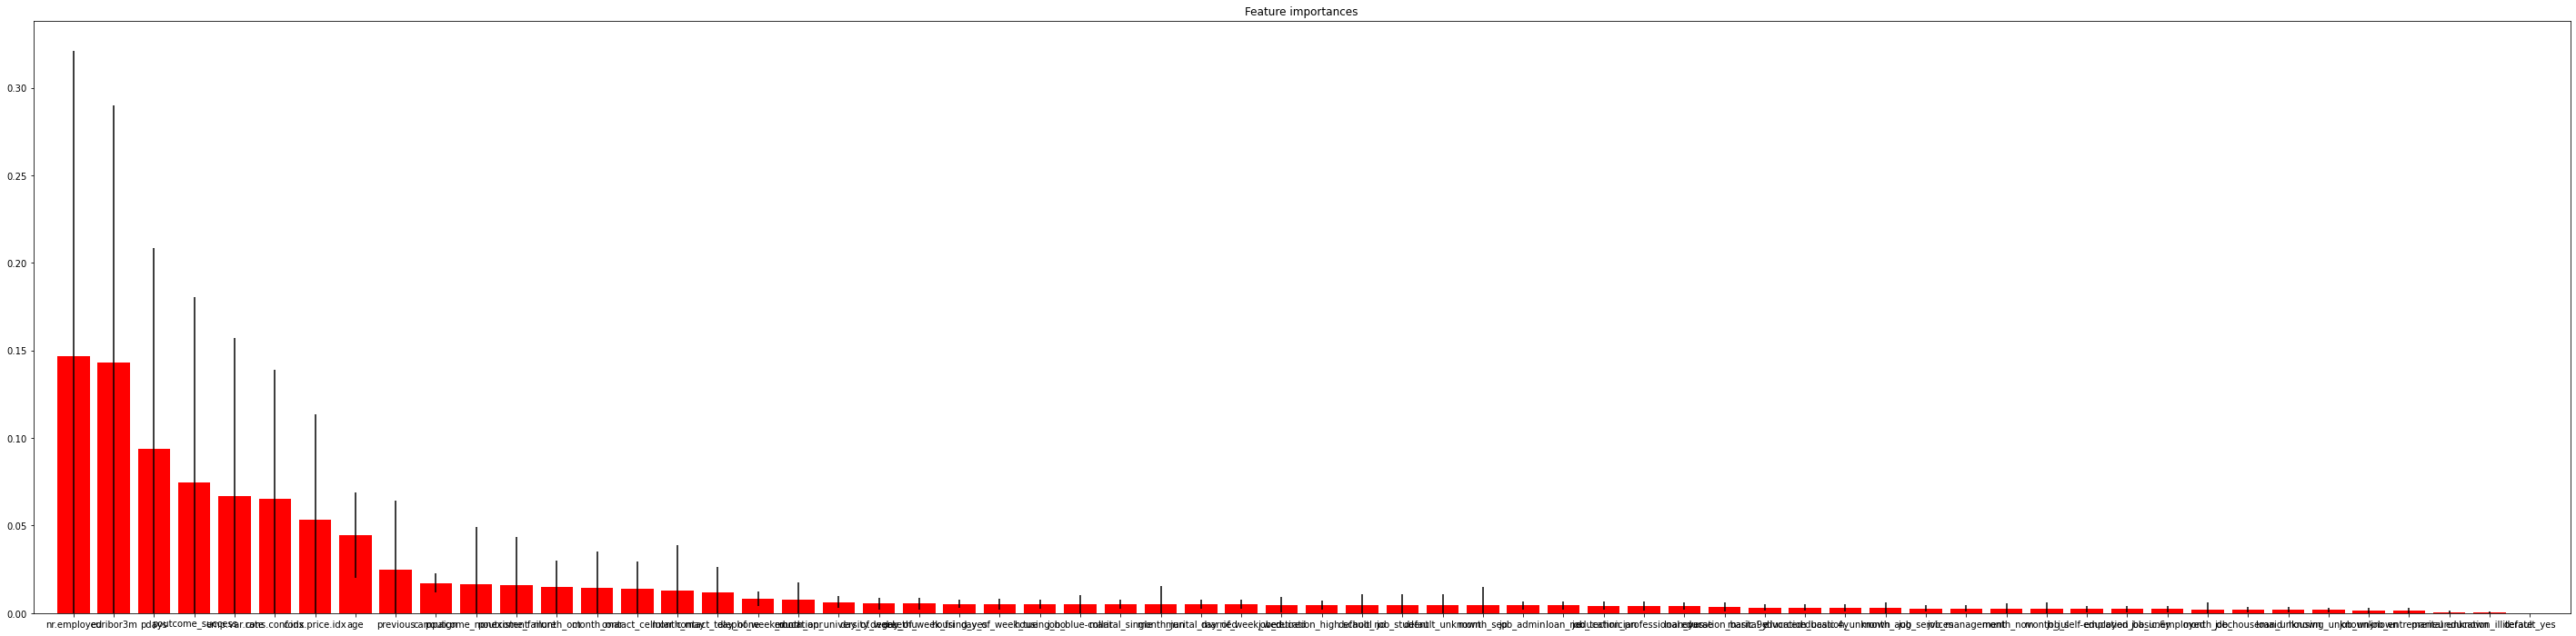

In [55]:
clf.fit(train_x, train_y)
X = train_x
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
features = train_x.columns
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(50, 12)
axes = plt.gca()
axes.set_ylim([0, None])

In [43]:
test_predic=clf_new.predict(test_x)
f1_score(test_y,test_predic)

0.2915951972555746